<h1><center>TEXT CLASSIFICATION</center></h1>
<h2><center> Assignment 7</center></h2>
<h2><center>Cars Data </center></h2>

## import libraries and load cars dataset

In [21]:
# Loading data set using pandas.
!pip install pandas

import pandas as pd

file= "C:/Users/shakkerar/Downloads/cars_Data.csv"
df = pd.read_csv('C:/Users/shakkerar/Downloads/cars_Data.csv', encoding='latin-1')
df.head(10)

Defaulting to user installation because normal site-packages is not writeable


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd
0,Subaru,Outback,automatic,silver,190000.0,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00
1,Subaru,Outback,automatic,blue,290000.0,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00
2,Subaru,Forester,automatic,red,402000.0,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00
3,Subaru,Impreza,mechanical,blue,10000.0,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00
4,Subaru,Legacy,automatic,black,280000.0,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11
5,Subaru,Outback,automatic,silver,132449.0,2011,gasoline,False,gasoline,2.5,universal,False,owned,all,14700.00
6,Subaru,Forester,automatic,black,318280.0,1998,gasoline,False,gasoline,2.5,universal,False,owned,all,3000.00
7,Subaru,Legacy,automatic,silver,350000.0,2004,gasoline,False,gasoline,2.5,sedan,False,owned,all,4500.00
8,Subaru,Outback,automatic,grey,179000.0,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,12900.00
9,Subaru,Forester,automatic,silver,571317.0,1999,gasoline,False,gasoline,2.5,universal,False,owned,all,4200.00


## Engine has gas 

<Axes: xlabel='engine_has_gas'>

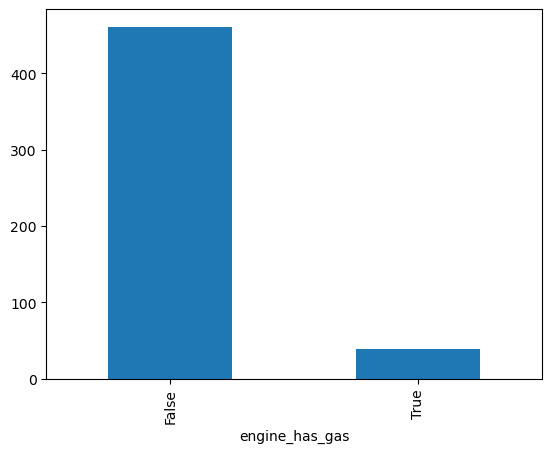

In [2]:
df['engine_has_gas'].value_counts().sort_index().plot(kind='bar')

## Function to remove odd words

In [22]:
import html
import re

def clean(text):
    # Convert HTML escapes like & to characters.
    text = html.unescape(text) 
    # Remove HTML tags.
    text = re.sub(r'<[^<>]*>', ' ', text)
    # Remove Markdown URLs like [Some text](https://....).
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # Remove text or code in brackets like [0].
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # Remove standalone sequences of specials.
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # Remove standalone sequences of hyphens like --- or ==.
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # Remove sequences of white spaces.
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


## step 1: Data cleaning

In [7]:
import html
import re

def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


def remove_odd_words(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)
    
df['model_name'] = df['model_name'].apply(remove_odd_words)

# Displaying a random sample of 2 rows
df.sample(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd
78,Subaru,Forester,automatic,blue,280000.0,2004,gasoline,False,gasoline,2.5,suv,False,owned,all,5800.0
338,LADA,Vesta,automatic,red,19800.0,2017,gasoline,False,gasoline,1.6,sedan,False,owned,front,9250.0


 ## Step 2: Train & Test Split

In [8]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the dataset
X = df['model_name']  # Features
y = df['engine_has_gas']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the resulting sets
print("Size of Training Features:", X_train.shape)
print("Size of Testing Features:", X_test.shape)
print("Size of Training Labels:", y_train.shape)
print("Size of Testing Labels:", y_test.shape)

Size of Training Features: (400,)
Size of Testing Features: (100,)
Size of Training Labels: (400,)
Size of Testing Labels: (100,)


## Step 3: Training the model

### Convert X_train to numbers

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


# Initializing a TfidfVectorizer object with specified parameters
tfidf = TfidfVectorizer(max_df=10, ngram_range=(1, 2), stop_words="english")

# Transforming the training data (X_train) into a TF-IDF representation
X_train_tf = tfidf.fit_transform(X_train)

# Transforming the test data (X_test) into a TF-IDF representation using the same vocabulary as the training data
X_test_tf = tfidf.transform(X_test)

print("Shape of TF-IDF matrix for training data:", X_train_tf.shape)
print("Shape of TF-IDF matrix for test data:", X_test_tf.shape)


Shape of TF-IDF matrix for training data: (400, 17)
Shape of TF-IDF matrix for test data: (100, 17)


 ## Building a model 

In [10]:
# Importing the LinearSVC class from the sklearn.svm module
from sklearn.svm import LinearSVC

# Initializing a LinearSVC model object with specified parameters
# random_state=0 ensures reproducibility of results
# tol=1e-5 specifies the tolerance for stopping criteria
model1 = LinearSVC(random_state=0, tol=1e-5, dual=True)

# Training the LinearSVC model on the TF-IDF transformed training data and corresponding target labels
model1.fit(X_train_tf, y_train)

LinearSVC(dual=True, random_state=0, tol=1e-05)

 ## Step 4: Testing the Model

 ### Accuracy of the Model

In [11]:
# Importing the accuracy_score function from sklearn.metrics module
from sklearn.metrics import accuracy_score

# Making predictions on the test data using the trained model
Y_pred = model1.predict(X_test_tf)

# Calculating the accuracy score by comparing the predicted labels (Y_pred) with the actual labels (Y_test)
accuracy = accuracy_score(y_test, Y_pred)

# Printing the accuracy score
print('Accuracy Score -', accuracy)

Accuracy Score - 0.91


 ### Run the Dummy

In [12]:
# Importing the DummyClassifier class from sklearn.dummy module
from sklearn.dummy import DummyClassifier

# Creating a DummyClassifier object with 'most_frequent' strategy
# 'most_frequent' strategy always predicts the most frequent class in the training data
# random_state=42 ensures reproducibility of results
clf = DummyClassifier(strategy='most_frequent', random_state=42)

# Training the DummyClassifier on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data using the trained DummyClassifier
Y_pred_baseline = clf.predict(X_test)

# Calculating the accuracy score by comparing the predicted labels (Y_pred_baseline) with the actual labels (Y_test)
baseline_accuracy = accuracy_score(y_test, Y_pred_baseline)

# Printing the accuracy score
print('Accuracy Score -', baseline_accuracy)

Accuracy Score - 0.91


 ## Confusion Matrix

In [13]:
# Importing the confusion_matrix function from sklearn.metrics module
from sklearn.metrics import confusion_matrix

# Making predictions on the test data using the trained model
Y_pred = model1.predict(X_test_tf)

# Calculating the confusion matrix by comparing the predicted labels (Y_pred) with the actual labels (Y_test)
# The confusion matrix provides a summary of predictions made by the model
# Rows correspond to actual classes, while columns correspond to predicted classes
# Each cell (i, j) in the matrix represents the number of instances of class i predicted as class j
# The diagonal elements (top-left to bottom-right) represent correctly classified instances
# Off-diagonal elements represent misclassifications
conf_matrix = confusion_matrix(y_test, Y_pred)

# Printing the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[91  0]
 [ 9  0]]


 ## Plotting Confusion Matrix

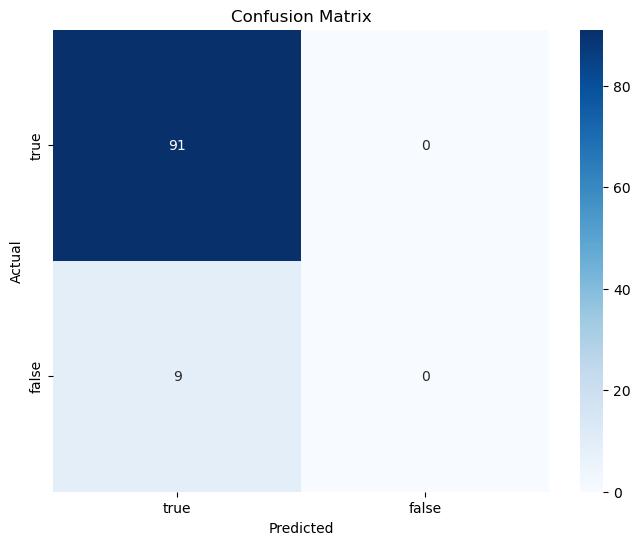

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)

# Creating a ConfusionMatrixDisplay object with the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model1.classes_)

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['true', 'false'], yticklabels=['true', 'false'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 ## Classification Report

In [15]:
from sklearn.metrics import classification_report

# Print classification report with zero_division='warn'
print("Classification Report:\n", classification_report(y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.91      1.00      0.95        91
        True       0.00      0.00      0.00         9

    accuracy                           0.91       100
   macro avg       0.46      0.50      0.48       100
weighted avg       0.83      0.91      0.87       100



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ## Dawnsampling

In [17]:
import pandas as pd

# Downsampling
df_downsampled = pd.concat([df[df['engine_has_gas'] == 'true'].sample(n=len(df[df['engine_has_gas'] == 'flase']), random_state=42), df[df['engine_has_gas'] == 'true']])

# Output
print(df_downsampled)

Empty DataFrame
Columns: [manufacturer_name, model_name, transmission, color, odometer_value, year_produced, engine_fuel, engine_has_gas, engine_type, engine_capacity, body_type, has_warranty, state, drivetrain, price_usd]
Index: []


Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

       False       0.91      1.00      0.95        91
        True       0.00      0.00      0.00         9

    accuracy                           0.91       100
   macro avg       0.46      0.50      0.48       100
weighted avg       0.83      0.91      0.87       100

Confusion Matrix:
 [[91  0]
 [ 9  0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


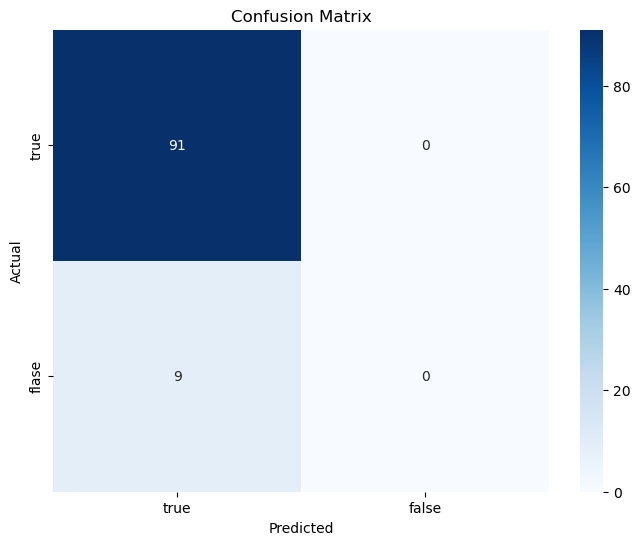

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


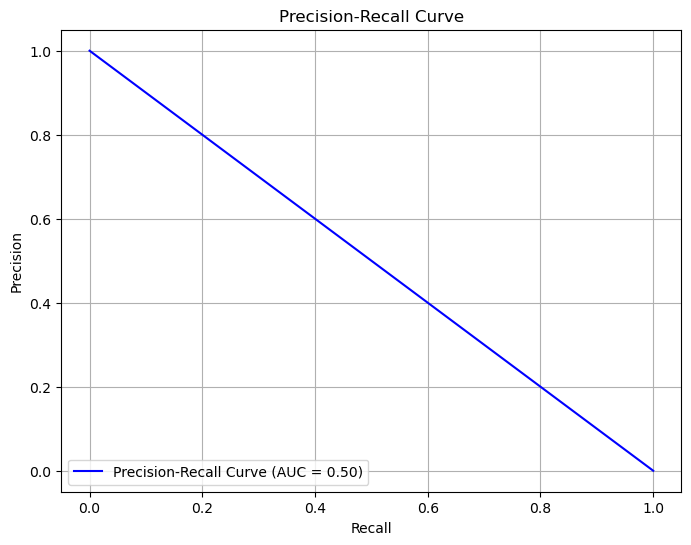

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['model_name'], df['engine_has_gas'], test_size=0.2, random_state=42)

# Creating a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['true', 'false'], yticklabels=['true', 'flase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Convert labels to binary format
y_test_binary = (y_test == 'false').astype(int)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test_binary, pipeline.predict_proba(X_test)[:, 1])

# Calculate Area Under Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
